# Media Sentiment Analysis

I found the whole debate going on about Reddit's WallStreetBets and GameStop stocks quite interesting, as there were some sides of the debate clamoring about how refreshing and uplifting it was to see that individual investors can also make money on the stock market, and not only the big sharks. But there also seemed to have some that were quite unhappy about how the whole investiment strategy was conducted.

I also wanted to practice my R skills some more.

And thus we arrive at: Media Sentiment Analysis with R, exploring how the reports from some of the most well regarded newspapers treated the GameStop x Reddit topic.

Matheus Schmitz  
<a href="https://www.linkedin.com/in/matheusschmitz/">LinkedIn</a>  
<a href="https://matheus-schmitz.github.io/">Github Portfolio</a>

## Prepare R Environment

In [231]:
# R on Jupyter has way to many warnings that clutter everything
options(warn=-1)

In [2]:
# Define working directory
setwd("C:/Portfolio/Media_Sentiment_Analysis")
getwd()

[1] "C:/Portfolio/Media_Sentiment_Analysis"

In [ ]:
# Load packages
library(tm)
library(topicmodels)
library(textdata)
library(rvest)
#library(tidyverse)
library(tidytext)
library(dplyr)
library(tidyr)
library(reshape2)
library(forcats)
library(scales)
library(stringr)
library(ggplot2)
library(wordcloud)
library(wordcloud2)
library(igraph)
library(ggraph)
library(RColorBrewer)

In [4]:
# Set a smaller plot size
options(repr.plot.width=8, repr.plot.height=4)

# Align all titles to the middle of the plot
theme_update(plot.title = element_text(hjust = 0.5))

## Web Scraping

In [5]:
# Web Scraping with rvest's real_html
?rvest::read_html

### New York Times

In [6]:
# Scrape an article from NY Times
article_nytimes <- rvest::read_html("https://www.nytimes.com/2021/02/01/business/gamestop-how-much-worth.html")

cat("Object Type: \n")
class(article_nytimes)

cat("Object Data: \n")
print(article_nytimes)
cat("\n")

# Get the article's title and print it
article_nytimes_title <- article_nytimes %>%
  rvest::html_nodes("title") %>%
  rvest::html_text()

cat("Article Tile: \n")
cat(article_nytimes_title)

Object Type: 


[1] "xml_document" "xml_node"

Object Data: 
{html_document}
<html lang="en" class="story nytapp-vi-article" xmlns:og="http://opengraphprotocol.org/schema/">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n    <div id="app"><div><div class="">\n<div><div class="NYTAppHid ...

Article Tile: 
What Is GameStop, the Company, Really Worth? Does It Matter? - The New York Times

In [7]:
# Extract the article's text
article_nytimes_text <- article_nytimes %>%
  rvest::html_nodes("p") %>%
  rvest::html_text()

cat("Object Type: \n")
class(article_nytimes_text)

cat("Object Data: \n")
head(article_nytimes_text)
cat("\n")

Object Type: 


[1] "character"

Object Data: 


[1] "Advertisement"                                                                                                                                                                                                                                                                                                                                                                                                                      
[2] "Supported by"                                                                                                                                                                                                                                                                                                                                                                                                                       
[3] "The frenzy for the troubled retailer’s stock has been a head-scratcher for the analysts who try to determine a company’s value."                                                                                                                                                                                                                                                                                                    
[4] "By Peter Eavis"                                                                                                                                                                                                                                                                                                                                                                                                                     
[5] "For many years, it didn’t matter that GameStop’s stores were a little grungy."                                                                                                                                                                                                                                                                                                                                                      
[6] "They were the place where millions of young people could trade in used games, debate the merits of different franchises and get advice from GameStop’s staff, often avid gamers themselves. In the 2000s, this winning formula propelled the company to open thousands of stores around the world and make money hand over fist. GameStop’s stock more than doubled in 2007 because investors believed the good times wouldn’t end."

In [8]:
# Convert data to a DataFrame
df_nytimes <- data.frame(line = 1, text = article_nytimes_text, stringsAsFactors = FALSE)
class(df_nytimes)
head(df_nytimes)

[1] "data.frame"

line,text
1,Advertisement
1,Supported by
1,The frenzy for the troubled retailer’s stock has been a head-scratcher for the analysts who try to determine a company’s value.
1,By Peter Eavis
1,"For many years, it didn’t matter that GameStop’s stores were a little grungy."
1,"They were the place where millions of young people could trade in used games, debate the merits of different franchises and get advice from GameStop’s staff, often avid gamers themselves. In the 2000s, this winning formula propelled the company to open thousands of stores around the world and make money hand over fist. GameStop’s stock more than doubled in 2007 because investors believed the good times wouldn’t end."


### Yahoo Finance

In [9]:
# Scrape an article from Yahoo
article_yahoo <- rvest::read_html("https://finance.yahoo.com/news/gamestop-amc-reddit-investing-213609595.html")

cat("Object Type: \n")
class(article_yahoo)

cat("Object Data: \n")
print(article_yahoo)
cat("\n")

# Get the article's title and print it
article_yahoo_title <- article_yahoo %>%
  rvest::html_nodes("title") %>%
  rvest::html_text()

cat("Article Tile: \n")
cat(article_yahoo_title)

Object Type: 


[1] "xml_document" "xml_node"

Object Data: 
{html_document}
<html id="atomic" class="Fz(62.5%) Pos(r)   desktop bktfinance-US-en-US-def ua-undefined ua-undefined" lang="en-US">
[1] <head>\n<script>\n        window.performance.mark('PageStart');\n         ...
[2] <body dir="ltr">\n<script id="wafer-db-config" type="application/json">\n ...

Article Tile: 
28% of Americans bought GameStop or other viral stocks in January: Harris Poll-Yahoo Finance survey

In [10]:
# Extract the article's text
article_yahoo_text <- article_yahoo %>%
  rvest::html_nodes("p") %>%
  rvest::html_text()

cat("Object Type: \n")
class(article_yahoo_text)

cat("Object Data: \n")
head(article_yahoo_text, 3)
cat("\n")

Object Type: 


[1] "character"

Object Data: 


[1] "Over a quarter of American adults say they bought GameStop (GME) or another viral stock in January, according to a new survey from Yahoo Finance and The Harris Poll."                                                                                               
[2] "The GameStop frenzy, kicked off by the subreddit r/wallstreetbets, struck a chord with many retail investors and individuals who resented what they viewed as the Wall Street establishment, a few hedge funds that had shorted the stock, betting it would go down."
[3] "The survey data speaks to the scope of the tug of war between short sellers and retail investors flooding the market with money."

In [11]:
# Convert data to a DataFrame
df_yahoo <- data.frame(line = 1, text = article_yahoo_text, stringsAsFactors = FALSE)
class(df_yahoo)
head(df_yahoo)

[1] "data.frame"

line,text
1,"Over a quarter of American adults say they bought GameStop (GME) or another viral stock in January, according to a new survey from Yahoo Finance and The Harris Poll."
1,"The GameStop frenzy, kicked off by the subreddit r/wallstreetbets, struck a chord with many retail investors and individuals who resented what they viewed as the Wall Street establishment, a few hedge funds that had shorted the stock, betting it would go down."
1,The survey data speaks to the scope of the tug of war between short sellers and retail investors flooding the market with money.
1,"Despite recent losses, GameStop is up more than 150% year-to-date. It’s now worth around 10% of its all-time intraday high, when it was trading at $483 for a moment at the end of January."
1,"Using a representative sample size of 1,089 Americans, the survey found that GameStop wasn’t actually the most popular stock from a “how many people bought it” standpoint. While 9% of Americans bought at least one share of GameStop, according to the poll, 10% bought a share of AMC Entertainment (AMC). Other popular stocks of the Reddit frenzy included BlackBerry (BB) at 6%, Nokia (NOK) at 5%, Castor Maritime (CTRM) at 4%, and about a dozen other ""meme stocks."""
1,"The median investment, according to the survey, was $150. Around 7% of people who bought viral stocks invested between $1,001 and $5,000 and 8% invested over $5,000. This drove up the average investment to $8,533."


### Time Magazine

In [12]:
# Scrape an article from timemag
article_timemag <- rvest::read_html("https://time.com/5933242/gamestop-stock-gme/")

cat("Object Type: \n")
class(article_timemag)

cat("Object Data: \n")
print(article_timemag)
cat("\n")

# Get the article's title and print it
article_timemag_title <- article_timemag %>%
  rvest::html_nodes("title") %>%
  rvest::html_text()

cat("Article Tile: \n")
cat(article_timemag_title)

Object Type: 


[1] "xml_document" "xml_node"

Object Data: 
{html_document}
<html lang="">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="template-article  ">\n    \n    <noscript>\n        <iframe  ...

Article Tile: 
Why Has GameStop's Stock Gone Up So High Recently? | Time Close

In [13]:
# Extract the article's text
article_timemag_text <- article_timemag %>%
  rvest::html_nodes("p") %>%
  rvest::html_text()

cat("Object Type: \n")
class(article_timemag_text)

cat("Object Data: \n")
head(article_timemag_text, 3)
cat("\n")

Object Type: 


[1] "character"

Object Data: 


[1] "When a company that most people have written off more or less for dead suddenly sees its stock price skyrocket by nearly 180% for no apparent reason, it’s the kind of thing that catches one’s attention. So it is with gaming retailer GameStop, a relic of the pre-Internet era when people had to drive to the mall to get the latest Call of Duty, rather than download it directly to their console or pre-order a physical disk for mail delivery. In five days, GameStop stock has risen from about $40 to as much as nearly $120 in intraday trading Monday."
[2] "What’s happening with GameStop’s stock is, in part, a story of some pretty boring market mechanics. But it’s also a tale of mysterious savants, for purposes of both fun and profit, whipping the masses into a stock-buying frenzy—and a story that will no doubt end in outrageous profits for some, but tears for many others, while exposing fundamental issues with how companies are valued along the way."                                                                                                                                                     
[3] "Here’s the TL;DR:"

In [14]:
# Convert data to a DataFrame
df_timemag <- data.frame(line = 1, text = article_timemag_text, stringsAsFactors = FALSE)
class(df_timemag)
head(df_timemag)

[1] "data.frame"

line,text
1,"When a company that most people have written off more or less for dead suddenly sees its stock price skyrocket by nearly 180% for no apparent reason, it’s the kind of thing that catches one’s attention. So it is with gaming retailer GameStop, a relic of the pre-Internet era when people had to drive to the mall to get the latest Call of Duty, rather than download it directly to their console or pre-order a physical disk for mail delivery. In five days, GameStop stock has risen from about $40 to as much as nearly $120 in intraday trading Monday."
1,"What’s happening with GameStop’s stock is, in part, a story of some pretty boring market mechanics. But it’s also a tale of mysterious savants, for purposes of both fun and profit, whipping the masses into a stock-buying frenzy—and a story that will no doubt end in outrageous profits for some, but tears for many others, while exposing fundamental issues with how companies are valued along the way."
1,Here’s the TL;DR:
1,"When you buy stock in a company, you’re (typically) making a bet that something will happen that leads that company’s stock to grow in value: a popular new product, a big executive hire, a great quarterly report, and so on. But if you think a company is going to tank, you can “short” that firm—basically, you borrow a number of shares in that company at the current price, then sell them in the hopes that you can then buy the same number of shares again later for a lower price, give those shares back to the lender by an agreed-upon time, and pocket the difference."
1,"As a business, GameStop, which primarily sells video games and gaming consoles, has been on a slow decline for some time. Not only does high-speed Internet make it possible for gamers to download the latest titles directly to their consoles, rendering much of GameStop’s business model archaic, but the chain is also a heavily mall-based business, and malls are, well, not doing great. GameStop has held on in part thanks to its business in used-games (which are cheaper, and which you can’t simply download) and because of high demand for the new PlayStation 5 and Xbox Series X/S consoles (for which GameStop is one of only a handful of approved retailers). That Ryan Cohen, co-founder of e-commerce darling Chewy, joined the board this month is also a reason for optimism. But overall, GameStop is running out of extra lives, its batteries are dying, and its parents are telling it to go to bed because it’s got school in the morning."
1,"The seeming inevitability of GameStop’s demise made it an obvious target for short sellers. However, shorting a stock is often riskier than owning one. When you own a stock, the maximum amount you can possibly lose is whatever amount you’ve invested—if you buy $20 worth of Tesla, and Tesla crashes to $0, you’re out $20. But with short selling, your maximum loss is theoretically limitless, as there’s no cap on a company’s value. If you short Tesla at $20, and Elon Musk announces his new car makes you both invincible and unfathomably attractive, causing Tesla’s stock to hit $1,000, you’re going to lose $980. Ouch."


## Natural Language Processing

### Tokenization

In [15]:
# unnest_tokens documentation
?tidytext::unnest_tokens

In [16]:
# anti_join documentaion
?dplyr::anti_join

In [17]:
# Tokenize New York Times
tokens_nytimes <- df_nytimes %>%
  tidytext::unnest_tokens(word, text) %>%
  dplyr::anti_join(stop_words) %>%
  dplyr::count(word, sort = TRUE)

head(tokens_nytimes)

Joining, by = "word"


word,n
stock,26
gamestop,24
company,13
gamestop’s,11
business,8
games,8


In [18]:
# Tokenize Yahoo
tokens_yahoo <- df_yahoo %>%
  tidytext::unnest_tokens(word, text) %>%
  dplyr::anti_join(stop_words) %>%
  dplyr::count(word, sort = TRUE)

head(tokens_yahoo)

Joining, by = "word"


word,n
stock,37
shares,23
trading,23
stocks,21
market,20
investors,19


In [19]:
# Tokenize Time Magazine
tokens_timemag <- df_timemag %>%
  tidytext::unnest_tokens(word, text) %>%
  dplyr::anti_join(stop_words) %>%
  dplyr::count(word, sort = TRUE)

head(tokens_timemag)

Joining, by = "word"


word,n
stock,19
short,16
gamestop,14
it’s,8
people,8
buy,7


### Frequency Histograms

Joining, by = "word"
Selecting by n


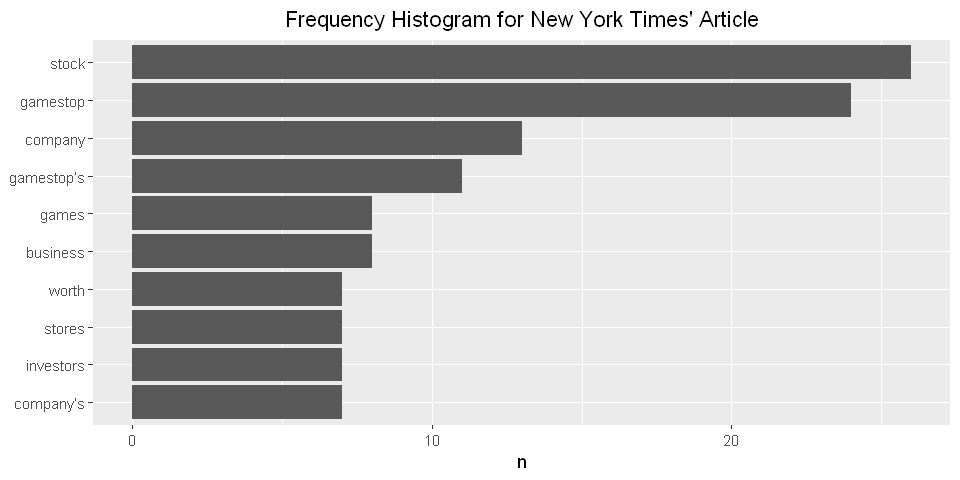

In [20]:
# New York Times
hist_nytimes <- df_nytimes %>%
  tidytext::unnest_tokens(word, text) %>%
  dplyr::anti_join(stop_words) %>%
  dplyr::count(word, sort = TRUE) %>%
  dplyr::top_n(10) %>% 
  dplyr::mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() +
  ggtitle("Frequency Histogram for New York Times' Article")

hist_nytimes

Joining, by = "word"
Selecting by n


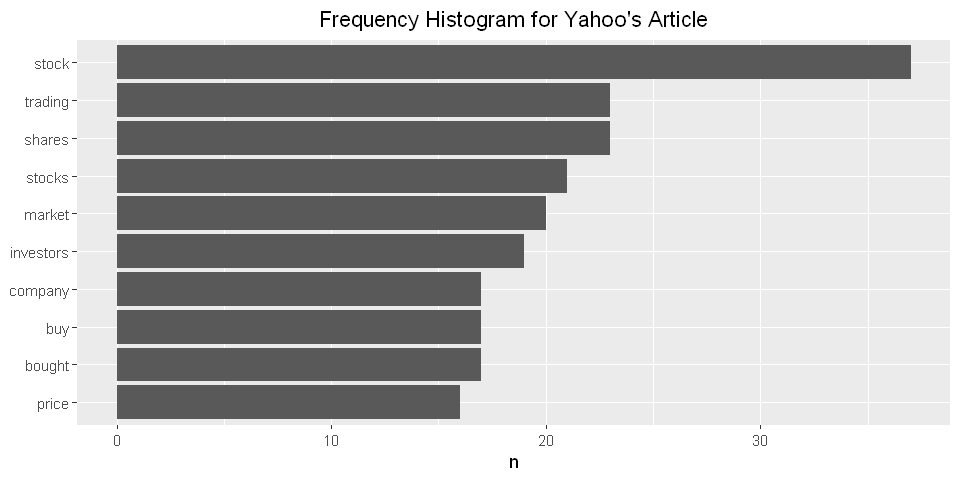

In [21]:
# New York Times
hist_yahoo <- df_yahoo %>%
  tidytext::unnest_tokens(word, text) %>%
  dplyr::anti_join(stop_words) %>%
  dplyr::count(word, sort = TRUE) %>%
  dplyr::top_n(10) %>% 
  dplyr::mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() +
  ggtitle("Frequency Histogram for Yahoo's Article")

hist_yahoo

Joining, by = "word"
Selecting by n


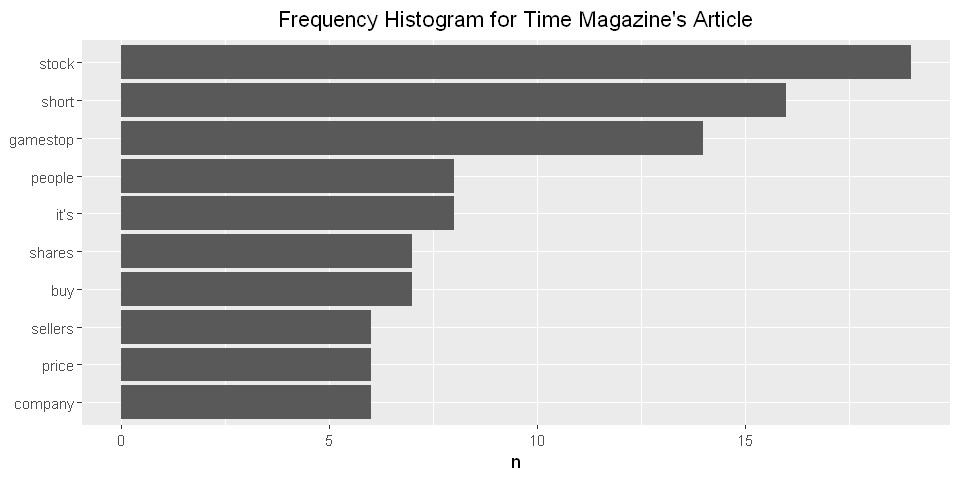

In [22]:
# New York Times
hist_timemag <- df_timemag %>%
  tidytext::unnest_tokens(word, text) %>%
  dplyr::anti_join(stop_words) %>%
  dplyr::count(word, sort = TRUE) %>%
  dplyr::top_n(10) %>% 
  dplyr::mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() +
  ggtitle("Frequency Histogram for Time Magazine's Article")

hist_timemag

### Correlation Analysis

In [25]:
# Remove stopwords
nytimes_clean <- df_nytimes %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words) 

yahoo_clean <- df_yahoo %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

timemag_clean <- df_timemag %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


In [23]:
# bind_rows
?dplyr::bind_rows

In [24]:
# str_extract
?stringr::str_extract

In [113]:
# Bind all articles as rows in a single dataframe
# Then keep only letters (no number or special punctuation except for ')
# Calculate the occurance rate of each word
# Drop the word count column
# Convert newspapers to columns, with the words as rows and the occurance rate of each word in each newspaper as the value
# Remove any NAs generated

word_frequencies <- bind_rows(mutate(nytimes_clean, newspaper = "NYTIMES"),
                            mutate(yahoo_clean, newspaper = "YAHOO"),
                            mutate(timemag_clean, newspaper = "TIME")) %>%
                          mutate(word = str_extract(word, "[a-z']+")) %>%
                          filter(!word=="NA") %>%
                          count(newspaper, word) %>%
                          group_by(newspaper)  %>%
                          mutate(proportion = n/sum(n)) %>%
                          select(-n) 
tail(word_frequencies)

newspaper,word,proportion
YAHOO,yielding,0.0003987241
YAHOO,youtube,0.0003987241
YAHOO,yr,0.0007974482
YAHOO,yuan,0.0007974482
YAHOO,zoom,0.0003987241
YAHOO,zuckerberg,0.0011961722


In [114]:
# Slice the dataframe back into invidiual newspapers
word_frequencies_nytimes <- word_frequencies %>% filter(newspaper=='NYTIMES') 
word_frequencies_yahoo   <- word_frequencies %>% filter(newspaper=='YAHOO')
word_frequencies_timemag <- word_frequencies %>% filter(newspaper=='TIME')

In [126]:
# Make pairwise comparison DFs
nytimes_yahoo <- merge(x = word_frequencies_nytimes, y = word_frequencies_yahoo, by = "word", all = TRUE) %>% 
                        filter(!proportion.x=="NA") %>% 
                        filter(!proportion.y=="NA")

nytimes_timemag <- merge(x = word_frequencies_nytimes, y = word_frequencies_timemag, by = "word", all = TRUE) %>% 
                        filter(!proportion.x=="NA") %>% 
                        filter(!proportion.y=="NA")

yahoo_timemag <- merge(x = word_frequencies_yahoo, y = word_frequencies_timemag, by = "word", all = TRUE) %>% 
                        filter(!proportion.x=="NA") %>% 
                        filter(!proportion.y=="NA")

#### Correlation Tests

In [129]:
## New York Times x Yahoo Finance
stats::cor.test(nytimes_yahoo$proportion.x, nytimes_yahoo$proportion.y)


	Pearson's product-moment correlation

data:  nytimes_yahoo$proportion.x and nytimes_yahoo$proportion.y
t = 9.158, df = 157, p-value = 2.728e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4783651 0.6829956
sample estimates:
      cor 
0.5900774 


In [132]:
## New York Times x Time Magazine
stats::cor.test(nytimes_timemag$proportion.x, nytimes_timemag$proportion.y)


	Pearson's product-moment correlation

data:  nytimes_timemag$proportion.x and nytimes_timemag$proportion.y
t = 11.048, df = 86, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6628382 0.8405472
sample estimates:
      cor 
0.7659469 


In [133]:
## Yahoo Finance x Time Magazine
stats::cor.test(yahoo_timemag$proportion.x, yahoo_timemag$proportion.y)


	Pearson's product-moment correlation

data:  yahoo_timemag$proportion.x and yahoo_timemag$proportion.y
t = 8.3365, df = 149, p-value = 4.688e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4442704 0.6638997
sample estimates:
      cor 
0.5639775 


#### Correlation Plots

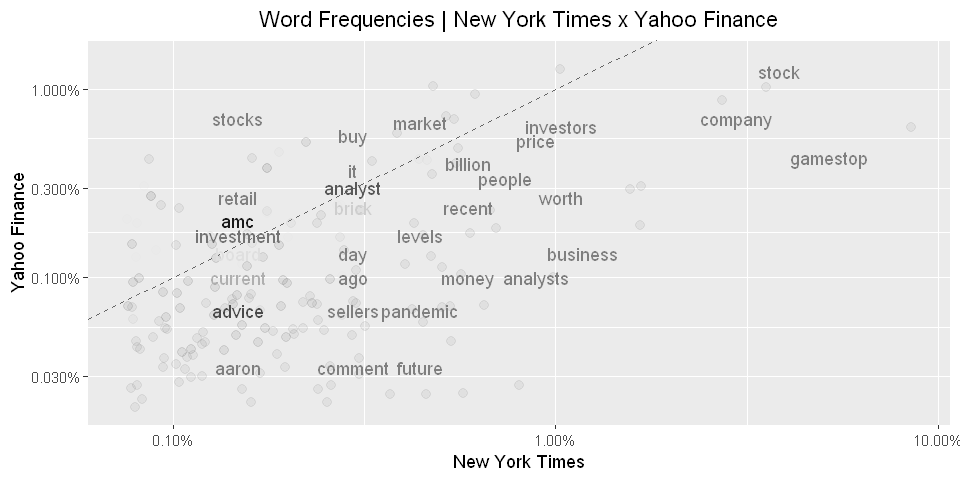

In [134]:
## New York Times x Yahoo Finance

# Plot
ggplot(nytimes_yahoo, aes(x=proportion.x, y=proportion.y, color=abs(proportion.x - proportion.y))) +
  geom_abline(color = "grey40", lty = 2) +
  geom_jitter(alpha = .1, size = 2.5, width = 0.3, height = 0.3) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format())  +
  scale_y_log10(labels= percent_format()) +
  scale_color_gradient(limits = c(0,0.001), low = "gray100", high = "gray0") +
  theme(legend.position = "none") +
  labs(x = "New York Times", y = "Yahoo Finance") +
  ggtitle("Word Frequencies | New York Times x Yahoo Finance")

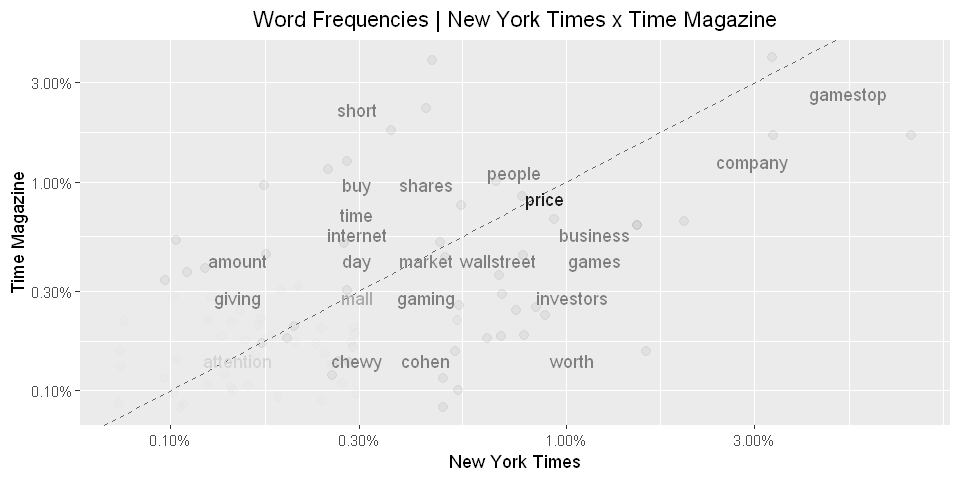

In [135]:
## New York Times x Time Magazine

# Plot
ggplot(nytimes_timemag, aes(x=proportion.x, y=proportion.y, color=abs(proportion.x - proportion.y))) +
  geom_abline(color = "grey40", lty = 2) +
  geom_jitter(alpha = .1, size = 2.5, width = 0.3, height = 0.3) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format())  +
  scale_y_log10(labels= percent_format()) +
  scale_color_gradient(limits = c(0,0.001), low = "gray100", high = "gray0") +
  theme(legend.position = "none") +
  labs(x = "New York Times", y = "Time Magazine") +
  ggtitle("Word Frequencies | New York Times x Time Magazine")

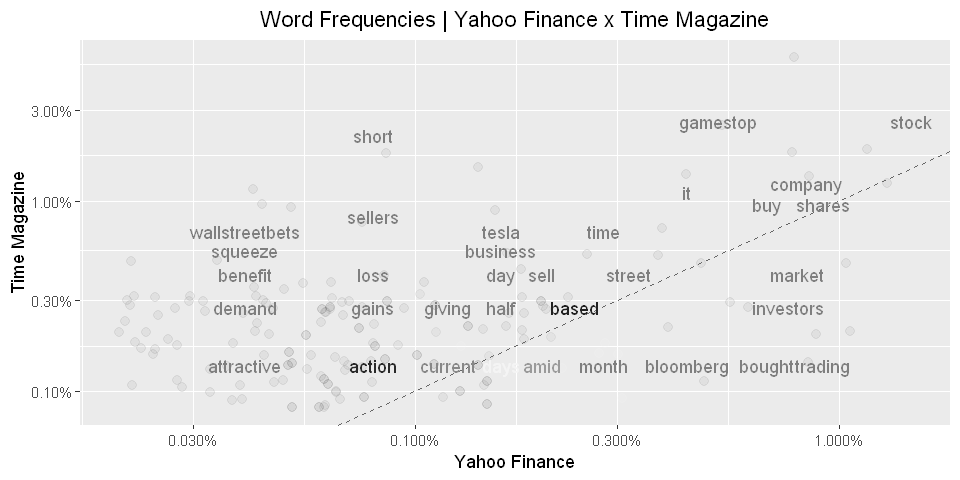

In [136]:
## Yahoo Finance x Time Magazine

# Plot
ggplot(yahoo_timemag, aes(x=proportion.x, y=proportion.y, color=abs(proportion.x - proportion.y))) +
  geom_abline(color = "grey40", lty = 2) +
  geom_jitter(alpha = .1, size = 2.5, width = 0.3, height = 0.3) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format())  +
  scale_y_log10(labels= percent_format()) +
  scale_color_gradient(limits = c(0,0.001), low = "gray100", high = "gray0") +
  theme(legend.position = "none") +
  labs(x = "Yahoo Finance", y = "Time Magazine") +
  ggtitle("Word Frequencies | Yahoo Finance x Time Magazine")

## Sentiment Analysis

In [139]:
# Using tidytext's get_sentiments
?tidytext::get_sentiments

In [148]:
# Using three methods: afinn, nrc, bing
afinn <- get_sentiments("afinn")
nrc <- get_sentiments("nrc")
bing <- get_sentiments("bing")

### New York Times

In [151]:
# AFINN
nytimes_afinn <- nytimes_clean %>%
                    inner_join(get_sentiments("afinn")) %>%
                    summarise(sentiment = sum(value)) %>%
                    mutate(method = "AFINN")

# BING
nytimes_bing <- nytimes_clean %>%
                    inner_join(get_sentiments("bing")) %>%
                    count(word, sentiment, sort = T)

# NRC
nytimes_nrc <- nytimes_clean %>%
                    inner_join(get_sentiments("nrc")) %>%
                    count(word, sentiment, sort = T) %>%
                    ungroup()

Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


Selecting by n


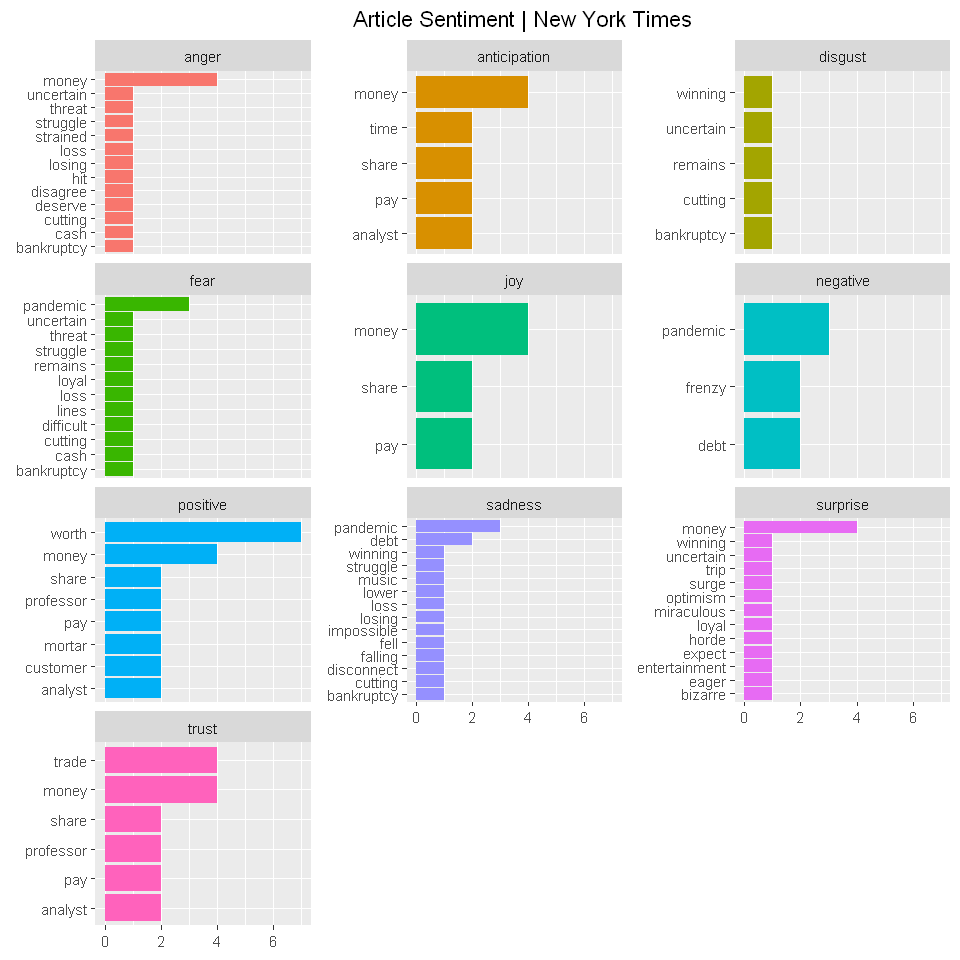

In [180]:
# Plot all sentiments
options(repr.plot.width=8, repr.plot.height=8)

nytimes_nrc %>%
  group_by(sentiment) %>%
  top_n(3) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y", ncol = 3) +
  ggtitle("Article Sentiment | New York Times") +
  labs(y = NULL, x = NULL) +
  coord_flip()

### Yahoo Finance

In [181]:
# AFINN
yahoo_afinn <- yahoo_clean %>%
                    inner_join(get_sentiments("afinn")) %>%
                    summarise(sentiment = sum(value)) %>%
                    mutate(method = "AFINN")

# BING
yahoo_bing <- yahoo_clean %>%
                    inner_join(get_sentiments("bing")) %>%
                    count(word, sentiment, sort = T)

# NRC
yahoo_nrc <- yahoo_clean %>%
                    inner_join(get_sentiments("nrc")) %>%
                    count(word, sentiment, sort = T) %>%
                    ungroup()

Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


Selecting by n


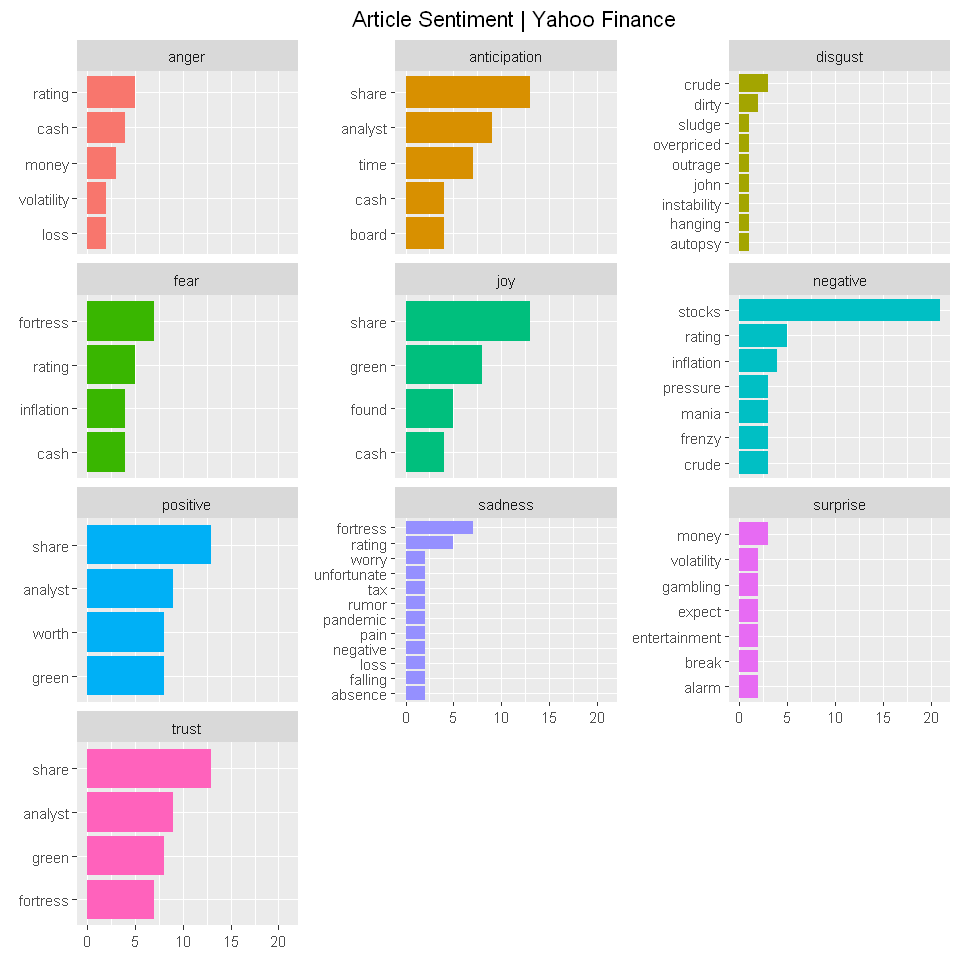

In [272]:
# Plot all sentiments
options(repr.plot.width=8, repr.plot.height=8)

yahoo_nrc %>%
  group_by(sentiment) %>%
  top_n(4) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y", ncol = 3) +
  ggtitle("Article Sentiment | Yahoo Finance") +
  labs(y = NULL, x = NULL) +
  coord_flip()

### Time Magazine

In [184]:
# AFINN
timemag_afinn <- timemag_clean %>%
                    inner_join(get_sentiments("afinn")) %>%
                    summarise(sentiment = sum(value)) %>%
                    mutate(method = "AFINN")

# BING
timemag_bing <- timemag_clean %>%
                    inner_join(get_sentiments("bing")) %>%
                    count(word, sentiment, sort = T)

# NRC
timemag_nrc <- timemag_clean %>%
                    inner_join(get_sentiments("nrc")) %>%
                    count(word, sentiment, sort = T) %>%
                    ungroup()

Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


Selecting by n


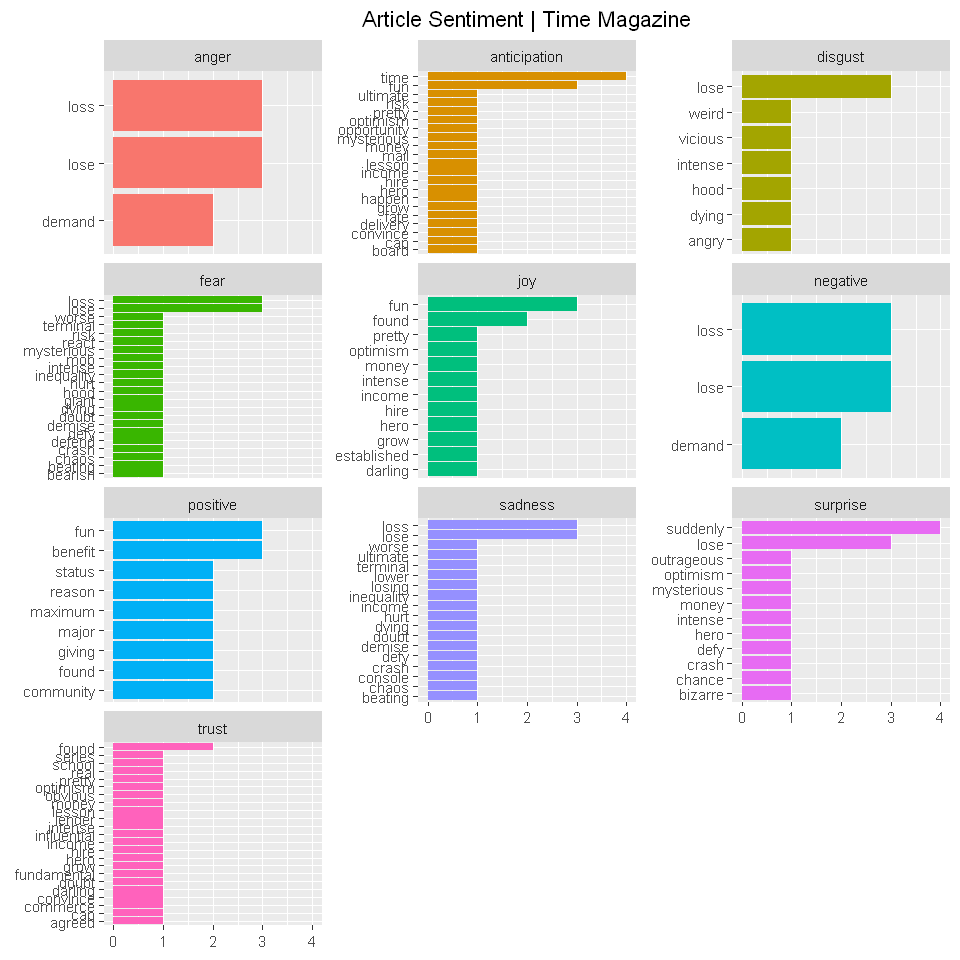

In [274]:
# Plot all sentiments
options(repr.plot.width=8, repr.plot.height=8)

timemag_nrc %>%
  group_by(sentiment) %>%
  top_n(3) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y", ncol = 3) +
  ggtitle("Article Sentiment | Time Magazine") +
  labs(y = NULL, x = NULL) +
  coord_flip()

## Frequent Words

In [213]:
# Merge all articles
df_merged <- bind_rows(mutate(df_nytimes, newspaper = "Yahoo"),
                          mutate(df_yahoo, newspaper = "TIME"),
                          mutate(df_timemag, newspaper = "NYtimes"))

In [214]:
# Remove stopwords and tokenize
df_merged_clean <- df_merged %>%
                    unnest_tokens(word, text) %>%
                    anti_join(stop_words) %>%
                    count(newspaper, word, sort = TRUE) %>%
                    ungroup()

Joining, by = "word"


In [215]:
# Total number of words
total_words <- df_merged_clean %>%
                    group_by(newspaper) %>%
                    summarize(total = sum(n))
total_words

newspaper,total
NYtimes,631
TIME,2667
Yahoo,706


In [216]:
# Left join
df_merged_clean <- left_join(df_merged_clean, total_words)

Joining, by = "newspaper"


In [217]:
?tidytext::bind_tf_idf

In [218]:
# TF-IDF
df_tf_idf <- df_merged_clean %>%
  bind_tf_idf(word, newspaper, n) %>%
  arrange(desc(tf_idf))

head(df_tf_idf)

newspaper,word,n,total,tf,idf,tf_idf
Yahoo,stores,7,706,0.009915014,1.0986123,0.010892756
Yahoo,online,6,706,0.008498584,1.0986123,0.009336648
NYtimes,shorting,4,631,0.006339144,1.0986123,0.006964262
NYtimes,suddenly,4,631,0.006339144,1.0986123,0.006964262
Yahoo,gamestop’s,11,706,0.015580737,0.4054651,0.006317445
Yahoo,percent,4,706,0.005665722,1.0986123,0.006224432


In [219]:
?rev

Selecting by tf_idf


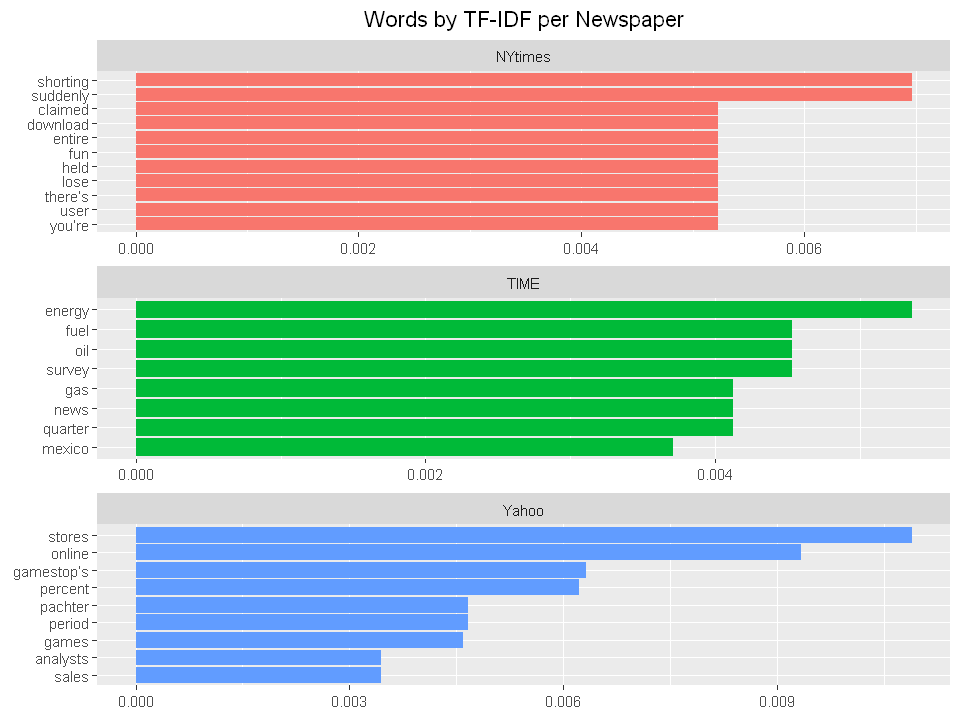

In [223]:
# Plot most frequent words
options(repr.plot.width=8, repr.plot.height=6)

df_tf_idf %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  group_by(newspaper) %>%
  top_n(8) %>%
  ungroup() %>%
  ggplot(aes(tf_idf, fct_reorder(word, tf_idf), fill = newspaper)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~newspaper, ncol = 1, scales = "free") +
  labs(x = NULL, y = NULL) +
  ggtitle("Words by TF-IDF per Newspaper")

## Word Clouds

In [225]:
# Remove stopwords and tokenize
df_merged2 <- df_merged %>%
                unnest_tokens(word, text) %>%
                anti_join(stop_words) %>%
                count(newspaper, word, sort=TRUE)

Joining, by = "word"


Joining, by = "word"


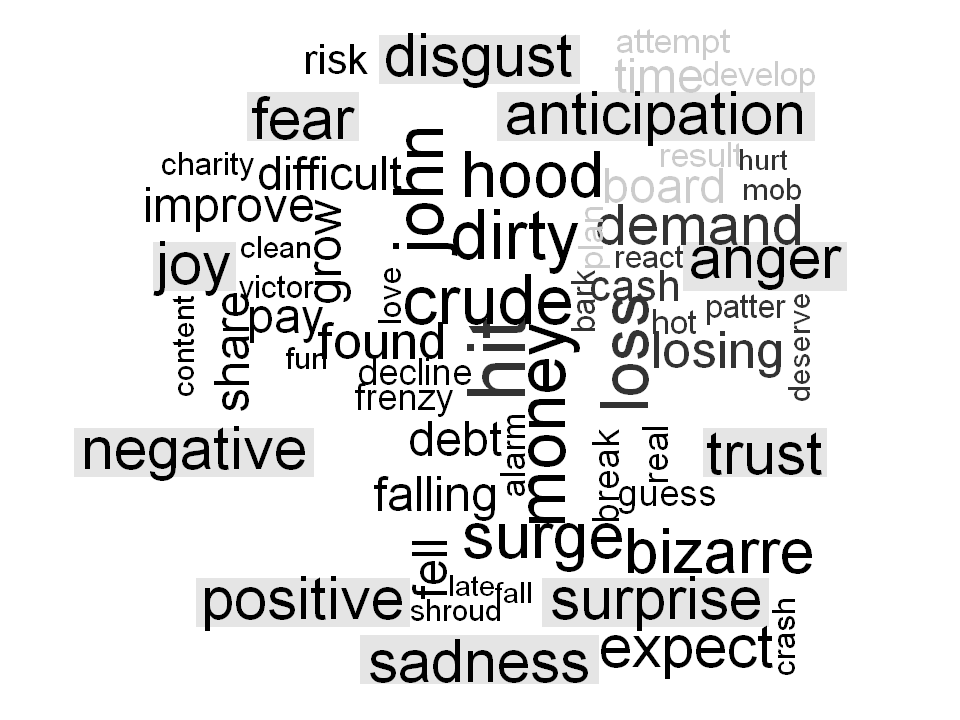

In [293]:
# Words x Emotions
options(repr.plot.width=8, repr.plot.height=6)

df_merged2 %>%
    inner_join(get_sentiments("nrc")) %>%
    count(word, sentiment, sort=TRUE) %>% 
    reshape2::acast(word ~ sentiment, value.var="n", fill=0) %>% # acast does cross-tabulation (eg a tf-idf sparse matrix)
    wordcloud::comparison.cloud(colors = c("gray20", "gray80"), max.words=150, rot.per=0.35)

Joining, by = "word"


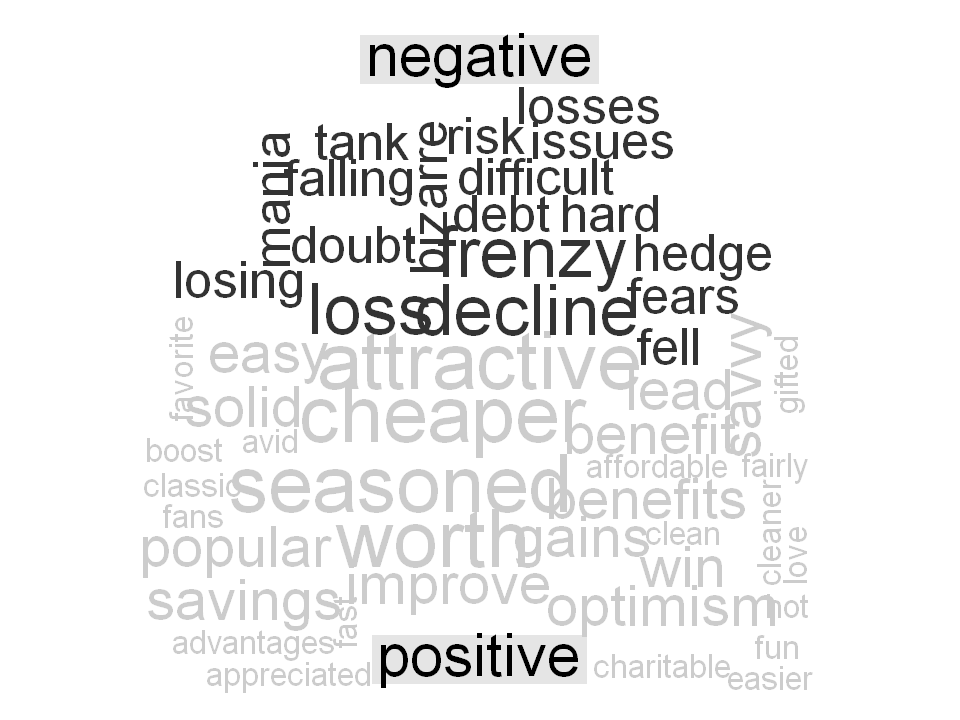

In [243]:
# Words x Positivity
options(repr.plot.width=8, repr.plot.height=6)

df_merged2 %>%
    inner_join(get_sentiments("bing")) %>%
    count(word, sentiment, sort=TRUE) %>% 
    reshape2::acast(word ~ sentiment, value.var="n", fill=0) %>% # acast does cross-tabulation (eg a tf-idf sparse matrix)
    wordcloud::comparison.cloud(colors = c("gray20", "gray80"), max.words=120)

In [307]:
# Words x Frequency
options(repr.plot.width=8, repr.plot.height=6)

df_merged2 %>%
    inner_join(get_sentiments("bing")) %>%
    count(word, sort=TRUE) %>% 
    rename(freq = n) %>%
    wordcloud2(size=1, color = "random-light", backgroundColor = "black")


Joining, by = "word"


HTML widgets cannot be represented in plain text (need html)

## Topic Modeling

In [263]:
# Create a Document Term Matrix for all articles
doc_term_matrix <- df_merged %>%
                        unnest_tokens(word, text) %>%
                        mutate(word = str_extract(word, "[a-z']+")) %>%
                        anti_join(stop_words) %>%
                        filter(!word=="NA") %>%
                        count(newspaper, word) %>%
                        cast_dtm(newspaper, word, n)

doc_term_matrix

Joining, by = "word"


<<DocumentTermMatrix (documents: 3, terms: 1761)>>
Non-/sparse entries: 2097/3186
Sparsity           : 60%
Maximal term length: 17
Weighting          : term frequency (tf)

### Latent Dirichlet Allocation

In [316]:
# Create model
LDA_model <- LDA(doc_term_matrix, k = 3) 
LDA_model

A LDA_VEM topic model with 3 topics.

In [317]:
# Topic Dataframes
df_topics <- tidy(LDA_model, matrix="beta") %>% arrange(desc(beta)) 
head(df_topics, 10)

topic,term,beta
2,gamestop,0.04313099
2,stock,0.03594249
1,stock,0.02765085
2,company,0.02316294
1,trading,0.01722737
2,short,0.01437700
1,company,0.01230373
3,bought,0.01168300
3,shares,0.01085334
1,price,0.01080803


In [318]:
# Top terms
top_terms <- df_topics %>%
                group_by(topic) %>%
                top_n(10, beta) %>%
                ungroup() %>%
                arrange(topic, -beta)
head(top_terms)

topic,term,beta
1,stock,0.027650852
1,trading,0.017227370
1,company,0.012303726
1,price,0.010808032
1,stocks,0.009656818
1,market,0.009631784


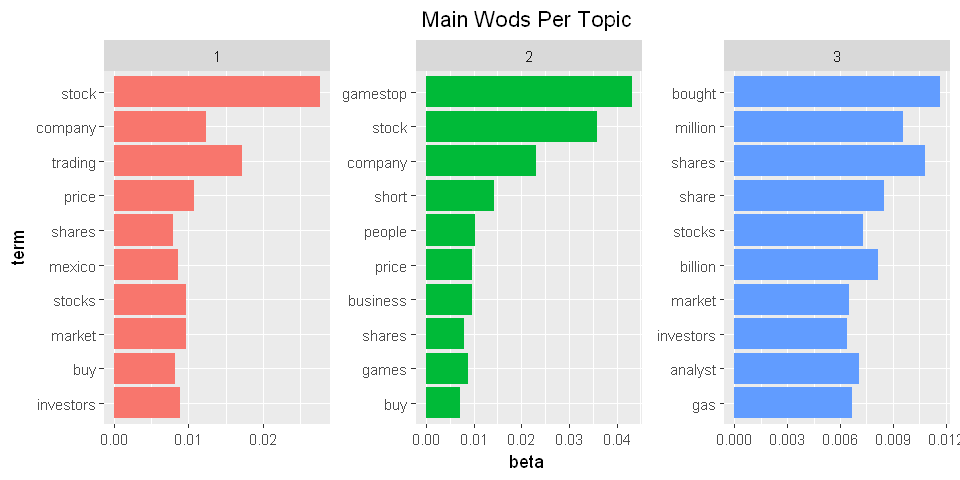

In [319]:
# Plot top terms
options(repr.plot.width=8, repr.plot.height=4)
top_terms %>%
    mutate(term = reorder(term, beta)) %>%
    ggplot(aes(term, beta, fill = factor(topic))) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~ topic, scales = "free") + 
    coord_flip() +
    ggtitle("Main Wods Per Topic")

## Conclusion

Considering the correlations, terms, TF-IDF, sentiments and LDA topics, there is no evidence of strong positive or negative reaction from the media. All newspapers' main goal seem to be in providing information maintaining a neutral, slightly positive tone.

# End
Matheus Schmitz  
<a href="https://www.linkedin.com/in/matheusschmitz/">LinkedIn</a>  
<a href="https://matheus-schmitz.github.io/">Github Portfolio</a>